<a href="https://colab.research.google.com/github/fThAbhishek-Pandey/eps-prediction-docs/blob/main/GitHub_CreditRisk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem statement -**
We have Customers Data
We Have trying to predict weather or not giving a loan

---
W.r.t. ***Banking***

### Asset = Loan Product
1.   Housing Loan
2.   Personal Loan
3.   Vehicle loan
4.   Group Loan
5.   Education Loan
6.   Credit Card

###Liability
(CASA)
1.   Current Account
2.   Saving amount
3.   Fixed Deposite (FD)
4.   Recuring deposit (RD)

## NPA = Non per-forming Asset
NPA = Loan that is defalted


---



1.   Disbursed Amount = LOAN Amount given to custmer
2.   OSP= Outstanding Principle
Loan = 1,00,000 ruppees
EMI =  8,000 rupees
40,000 rupees pay
60,000 rupees is paying to back = OSP
3.   DPD  = Days past due
time amount to delay to pay loan
DPD is identically Zero
"Defalted" ---> DPO >0
4.   PAR   = Portpholio at risk
    OSP> 0 when DPD > 0
5.   NDA   =
   loan account when DPO >90 days
   NPA account
#  Credit Risk Types in Banking


1. DPD(Zero)      : NDA (Non delinquint Account) = No defalt account
2. DPD (1 To 30)  : SMA1 (Standerd Monitoring Account)
3. DPD (31 To 60) : SMA2 (Standerd Monitoring Account)
4. DPD (61 To 90) : SMA3 (Standerd Monitoring Account)
5. DPD (91 To 180): NPA
6. DPD (>180)     : Writen off

NPA improve = Loan Portfolio quality of the bank will be better
            = Market sentiment is good
            = Stock price is improve

  

---

NPA = GNPA + NNPA
GNPA = Gross NPA ( 3-5%) = OSP defalt
NNPA =  Net NPA = ( 0.01 to 0.06%) = Provising Amount subtract

##Bank quality assess , GNPA value


---
Civil data set = Set of data which history of all account of different Bank

#coustomer priority
p1>p2>p3>p4


*   P1  = best custmer
*   P2 =Second Best
*   P3 =Third Best
*   P4 = Worst Customer


---

# Coding Section
# Import necessary Library

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
import warnings
import os
import time

Seeing DATA

loading the Data set

In [ ]:
a1= pd.read_excel("/content/case_study1.xlsx")
a2= pd.read_excel("/content/case_study2.xlsx")
df1= a1.copy() # internal bank detail
df2=a2.copy()  #external or civil data

#Feature engineering

-9999 is a null value and remove it

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PROSPECTID            51336 non-null  int64  
 1   Total_TL              51336 non-null  int64  
 2   Tot_Closed_TL         51336 non-null  int64  
 3   Tot_Active_TL         51336 non-null  int64  
 4   Total_TL_opened_L6M   51336 non-null  int64  
 5   Tot_TL_closed_L6M     51336 non-null  int64  
 6   pct_tl_open_L6M       51336 non-null  float64
 7   pct_tl_closed_L6M     51336 non-null  float64
 8   pct_active_tl         51336 non-null  float64
 9   pct_closed_tl         51336 non-null  float64
 10  Total_TL_opened_L12M  51336 non-null  int64  
 11  Tot_TL_closed_L12M    51336 non-null  int64  
 12  pct_tl_open_L12M      51336 non-null  float64
 13  pct_tl_closed_L12M    51336 non-null  float64
 14  Tot_Missed_Pmnt       51336 non-null  int64  
 15  Auto_TL            

In [ ]:
df1

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,5,4,1,0,0,0.000,0.00,0.200,0.800,...,0,0,1,0,4,1,4,0,72,18
1,2,1,0,1,0,0,0.000,0.00,1.000,0.000,...,0,1,0,0,0,0,1,0,7,7
2,3,8,0,8,1,0,0.125,0.00,1.000,0.000,...,0,6,1,0,0,2,6,0,47,2
3,4,1,0,1,1,0,1.000,0.00,1.000,0.000,...,0,0,0,0,0,0,1,1,5,5
4,5,3,2,1,0,0,0.000,0.00,0.333,0.667,...,0,0,0,0,0,3,0,2,131,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,51332,3,0,3,1,0,0.333,0.00,1.000,0.000,...,0,2,0,0,0,0,3,1,24,5
51332,51333,4,2,2,0,1,0.000,0.25,0.500,0.500,...,0,2,0,0,0,2,2,0,74,7
51333,51334,2,1,1,1,1,0.500,0.50,0.500,0.500,...,0,2,0,0,0,0,2,0,9,5
51334,51335,2,1,1,0,0,0.000,0.00,0.500,0.500,...,0,2,0,0,0,0,2,0,15,8


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROSPECTID                    51336 non-null  int64  
 1   time_since_recent_payment     51336 non-null  int64  
 2   time_since_first_deliquency   51336 non-null  int64  
 3   time_since_recent_deliquency  51336 non-null  int64  
 4   num_times_delinquent          51336 non-null  int64  
 5   max_delinquency_level         51336 non-null  int64  
 6   max_recent_level_of_deliq     51336 non-null  int64  
 7   num_deliq_6mts                51336 non-null  int64  
 8   num_deliq_12mts               51336 non-null  int64  
 9   num_deliq_6_12mts             51336 non-null  int64  
 10  max_deliq_6mts                51336 non-null  int64  
 11  max_deliq_12mts               51336 non-null  int64  
 12  num_times_30p_dpd             51336 non-null  int64  
 13  n

In [ ]:
df2

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,549,35,15,11,29,29,0,0,0,...,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,47,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,302,11,3,9,25,25,1,9,8,...,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,583,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,51332,15,24,23,2,24,24,0,0,0,...,0.0,0.0,0.0,1.661,0,0,ConsumerLoan,ConsumerLoan,650,P4
51332,51333,57,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,0.520,0,0,others,others,702,P1
51333,51334,32,-99999,-99999,0,-99999,0,0,0,0,...,0.0,1.0,0.0,0.567,0,0,ConsumerLoan,others,661,P3
51334,51335,58,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,1.202,0,0,ConsumerLoan,others,686,P2


In [ ]:
# remove null
df1=df1.loc[df1['Age_Oldest_TL'] !=-9999]

#Remove Rollumns
We triverse a loop and go to every colloum and check number of -9999 (null value) is greater than 10,000 (threshold value ) we remove that collumns


In [ ]:
colums_to_be_removed=[] # creating a null list
for i in df2.columns:
  if df2.loc[df2[i]==-9999].shape[0] >10000:
    colums_to_be_removed.append(i)

In [ ]:
df2 =df2.drop(colums_to_be_removed,axis=0)

In [ ]:
for i in df2.columns :
  df2=df2.loc[df2[i] !=-9999]

##Checking Null Value

In [ ]:
df2.isna().sum()

PROSPECTID                      0
time_since_recent_payment       0
time_since_first_deliquency     0
time_since_recent_deliquency    0
num_times_delinquent            0
                               ..
GL_Flag                         0
last_prod_enq2                  0
first_prod_enq2                 0
Credit_Score                    0
Approved_Flag                   0
Length: 62, dtype: int64

# Merge df1 and df2
Cheching common culumn

In [ ]:
for i in list(df1.columns):
  if i in list(df2.columns):
    print(i)

PROSPECTID


## mrege the data frame , inner join so that no nulls are present

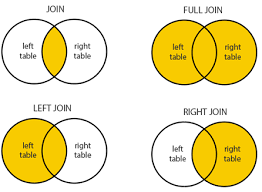

In [ ]:
df = pd.merge(df1, df2, how='inner', left_on = ['PROSPECTID'], right_on=['PROSPECTID'] )

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 87 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROSPECTID                    51336 non-null  int64  
 1   Total_TL                      51336 non-null  int64  
 2   Tot_Closed_TL                 51336 non-null  int64  
 3   Tot_Active_TL                 51336 non-null  int64  
 4   Total_TL_opened_L6M           51336 non-null  int64  
 5   Tot_TL_closed_L6M             51336 non-null  int64  
 6   pct_tl_open_L6M               51336 non-null  float64
 7   pct_tl_closed_L6M             51336 non-null  float64
 8   pct_active_tl                 51336 non-null  float64
 9   pct_closed_tl                 51336 non-null  float64
 10  Total_TL_opened_L12M          51336 non-null  int64  
 11  Tot_TL_closed_L12M            51336 non-null  int64  
 12  pct_tl_open_L12M              51336 non-null  float64
 13  p

# Formating Data for Training model


   We can divide the feature into


1.   Categorial
2.   Numerical

#### Treat them seperatly
## Check how many columns are categorical

In [ ]:
for i in df.columns:
  if df[i].dtype=='object':
    print(i)

MARITALSTATUS
EDUCATION
GENDER
last_prod_enq2
first_prod_enq2
Approved_Flag


*Columns are categorical are listed here*
1.   Marterial Status
2.   Education
3.   Gender
4.   last _prod_enq2
5.   first_prod_enq2
6.   Approved_FLAG

In [ ]:
df['MARITALSTATUS'].value_counts()

MARITALSTATUS
Married    37752
Single     13584
Name: count, dtype: int64

In [ ]:
df['EDUCATION'].value_counts()

EDUCATION
GRADUATE          16673
12TH              14467
SSC                9276
UNDER GRADUATE     5492
OTHERS             2917
POST-GRADUATE      2242
PROFESSIONAL        269
Name: count, dtype: int64

In [ ]:
df['GENDER'].value_counts()

GENDER
M    45245
F     6091
Name: count, dtype: int64

In [ ]:
df['last_prod_enq2'].value_counts()

last_prod_enq2
others          20831
ConsumerLoan    17793
PL               7959
CC               2339
AL               1511
HL                903
Name: count, dtype: int64

In [ ]:
df['first_prod_enq2'].value_counts()

first_prod_enq2
others          28120
ConsumerLoan    11860
PL               4889
AL               2870
CC               2188
HL               1409
Name: count, dtype: int64

#chi-square test

In [ ]:
for i in ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']:
    chi2, pval, _, _ = chi2_contingency(pd.crosstab(df[i], df['Approved_Flag']))
    print(i, '---', pval)


MARITALSTATUS --- 2.7588304433709322e-257
EDUCATION --- 8.464676085080213e-38
GENDER --- 0.0002450667989541709
last_prod_enq2 --- 0.0
first_prod_enq2 --- 0.0


#hypothetical Testing
#inferential statics

#problem
#### Are marital satus and approved  associated?


1.   H0: NULL hypothesis  
#### not associated
2.   H1: Alternate hypothesis
#### associated

3. Alpha  (assumed)


      *  significance Level
      *   strictness
      *  Margin error
         5% =0.05
          less risky Project = High alpha
          more risky Project less alpha
      *    Confidence interval = 1- alpha

4.   Culculate the evidence agains H0

p-value
culculate using test

*   T-test

*   Chisqure
*   Anova
*   Degree of freedom
5.   p-value <= alpha  
      
      Reject H0
    p-value >alpha
    fail to reject H0

    interview question for DS - Accept H0 ?
    answer : analogy with court law

# what are these test

*   chisquare = Categories vs Categories
*   T-Test = Categ Vs Cat (2 cotegries)
*   Anova = Categories vs num (>=3 cotegories)

##Contingency table


##Multicolinearity vs Correlation
Multicollinearity = Predictiability of feature by other feature
###importent
Correlation is speciphic to linear relationship between Columns
In convex function , Correlation gives misleading value.


#VIF value


*   Variance Inflaction Factor

*   Used to identify multicolliarty among IVs
*  Takes R- squared value for each IV and eliminate if crosses a thresold

# in our case we take  tresold 6
*   **VIFi** = 1/ (1-Ri^2)


1.   VIF range from 1 To infinity

2.   VIF between 1 and 5 : Low multicollineerity

3.   VIF between 5 to 10 : moderate  Multicollinearity

4.   VIF above 10 : high multicollinearity





#VIF sequencialy Check
v1 ,v2 , v3 ,v4 ,v5, v6, v7, v8, v9 , v10

1.   parallel
2.   sequencial -->  more efficient and it is useful

v1 ,v2 , v3 ,v4 ,v5, v6, v7, v8, v9 , v10

v2 , v3 ,v4 ,v5, v6, v7, v8, v9 , v10

v3 ,v4 ,v5, v6, v7, v8, v9 , v10





# VIF for numerical columns

In [ ]:
numeric_columns = []
for i in df.columns:
    if df[i].dtype != 'object' and i not in ['PROSPECTID','Approved_Flag']:
        numeric_columns.append(i)


In [ ]:
#vif sequenciy check
vif_data = df[numeric_columns]
total_columns= vif_data.shape[1]
column_to_be_kept = []
column_index=0

In [ ]:
for i in range (0, total_columns):
  vif_value=variance_inflation_factor(vif_data , column_index)
  print(column_index,'---' , vif_value)
  if vif_value<=6 :
     column_to_be_kept.append(numeric_columns[i])
     column_index= column_index+1
  else :
     vif_data=vif_data.drop([numeric_columns[i]],axis=1)



/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


0 --- inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


0 --- inf
0 --- 11.142024054348209
0 --- 8.335916685517896
0 --- 6.463010922496309
0 --- 5.534338081913392
1 --- 2.7686962095701313


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


2 --- inf
2 --- 2462.4419800557143
2 --- 8.248565731413738
2 --- 3.7005074426983744
3 --- 5.345861316163595
4 --- 5.487408493299266
5 --- 2.007006964003804


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


6 --- inf
6 --- 4.825396961779916
7 --- 21.35788522795106
7 --- 33.7312064074522
7 --- 4.4589248415547065
8 --- 3.0256428589655155
9 --- 2.8232264699260554
10 --- 4.559577060503609
11 --- 2.1868059442203522
12 --- 10304.74363772914
12 --- 1.0163306107119952
13 --- 1.3077371916871567
14 --- 594916843.2536781
14 --- 6697913.387088732
14 --- 8.833627853741568
14 --- 5.831534786166029
15 --- 5.411420161253213


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


16 --- inf
16 --- 7.59738152314555
16 --- 1.546816762242094
17 --- 8.337257020955242
17 --- 2.178453754790822
18 --- 8.831456557200411
18 --- 1.63160295793182
19 --- 7.071388311384496
19 --- 15.543852815081975
19 --- 1.9680509535969288
20 --- 1.5652951537350035
21 --- 2.546399219282383
22 --- 3.103617519649694
23 --- 2.1918035493390158
24 --- 7.384677371724357
24 --- 2.074497017027807
25 --- 2.7237404160585945
26 --- 6.293500947046621
26 --- 2.709506792824967
27 --- 4.974334443038772
28 --- 345919259.0287266
28 --- 2992625835.601257
28 --- 11996291120.704754
28 --- 1431937079.2660658
28 --- 1787956513.2901745
28 --- 5369011857.07013
28 --- 500717135.084179
28 --- 8358.042814974533
28 --- 668774090.3879377
28 --- 786060777.1803054
28 --- 1.3762266586619556
29 --- 21.239202084829607
29 --- 2.870772683673688
30 --- 3.3473430734875014
31 --- 9.265637089357975
31 --- 6.496060757304039
31 --- 1.011410956040657
32 --- 67.02279235811868
32 --- 3.1375569461047665
33 --- 34.109022299576566
33 --

# check Anova for columns_to_be_kept


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 87 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROSPECTID                    51336 non-null  int64  
 1   Total_TL                      51336 non-null  int64  
 2   Tot_Closed_TL                 51336 non-null  int64  
 3   Tot_Active_TL                 51336 non-null  int64  
 4   Total_TL_opened_L6M           51336 non-null  int64  
 5   Tot_TL_closed_L6M             51336 non-null  int64  
 6   pct_tl_open_L6M               51336 non-null  float64
 7   pct_tl_closed_L6M             51336 non-null  float64
 8   pct_active_tl                 51336 non-null  float64
 9   pct_closed_tl                 51336 non-null  float64
 10  Total_TL_opened_L12M          51336 non-null  int64  
 11  Tot_TL_closed_L12M            51336 non-null  int64  
 12  pct_tl_open_L12M              51336 non-null  float64
 13  p

In [ ]:
from scipy.stats import f_oneway
columns_to_be_kept_numerical =[]
for i in column_to_be_kept:
 a= list(df[i])
 b= list(df['Approved_Flag'])
 group_p1 =[value for value ,group in zip(a,b) if group =='P1']
 group_p2 =[value for value ,group in zip(a,b) if group =='P2']
 group_p3 =[value for value ,group in zip(a,b) if group =='P3']
 group_p4 =[value for value ,group in zip(a,b) if group =='P4']
 f_statistic, p_value = f_oneway(group_p1,group_p2, group_p3, group_p4)
 if p_value<=0.05:
  columns_to_be_kept_numerical.append(i)

In [ ]:
df

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,5,4,1,0,0,0.000,0.00,0.200,0.800,...,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,1,0,1,0,0,0.000,0.00,1.000,0.000,...,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,8,0,8,1,0,0.125,0.00,1.000,0.000,...,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,1,0,1,1,0,1.000,0.00,1.000,0.000,...,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,3,2,1,0,0,0.000,0.00,0.333,0.667,...,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,51332,3,0,3,1,0,0.333,0.00,1.000,0.000,...,0.0,0.0,0.0,1.661,0,0,ConsumerLoan,ConsumerLoan,650,P4
51332,51333,4,2,2,0,1,0.000,0.25,0.500,0.500,...,0.0,0.0,0.0,0.520,0,0,others,others,702,P1
51333,51334,2,1,1,1,1,0.500,0.50,0.500,0.500,...,0.0,1.0,0.0,0.567,0,0,ConsumerLoan,others,661,P3
51334,51335,2,1,1,0,0,0.000,0.00,0.500,0.500,...,0.0,0.0,0.0,1.202,0,0,ConsumerLoan,others,686,P2


#level 3

##level encoding for the numarical value

In [ ]:
['MARITALSTATUS','EDUCATION','GENDER','last_prod_enq2','first_prod_enq2']

['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']

In [ ]:
df['MARITALSTATUS'].unique()


array(['Married', 'Single'], dtype=object)

In [ ]:
df['EDUCATION'].unique()


array(['12TH', 'GRADUATE', 'SSC', 'POST-GRADUATE', 'UNDER GRADUATE',
       'OTHERS', 'PROFESSIONAL'], dtype=object)

In [ ]:
df['GENDER'].unique()


array(['M', 'F'], dtype=object)

In [ ]:
df['last_prod_enq2'].unique()


array(['PL', 'ConsumerLoan', 'others', 'AL', 'CC', 'HL'], dtype=object)

In [ ]:
df['first_prod_enq2'].unique()

array(['PL', 'ConsumerLoan', 'others', 'AL', 'HL', 'CC'], dtype=object)

We can only lavel encode for education because it is acendang order and have determenatic physical evalution



*   Ordinal feature  --- Education

*   SSC                 :1

*   12th                :2
*   Graduate            :3
*   Undergraduate       :3
*   Others              :1 (others can be verified by the bussiness and user)
*   post graduate       :4


In [ ]:
df.loc[df['EDUCATION']=='SSC',['EDUCATION']] =1
df.loc[df['EDUCATION']=='12TH',['EDUCATION']] =2
df.loc[df['EDUCATION']=='GRADUATE',['EDUCATION']] =3
df.loc[df['EDUCATION']=='UNDER GRADUATE',['EDUCATION']] =3
df.loc[df['EDUCATION']=='POST-GRADUATE',['EDUCATION']] =4
df.loc[df['EDUCATION']=='OTHERS',['EDUCATION']] =1
df.loc[df['EDUCATION']=='PROFESSIONAL',['EDUCATION']] =3

In [ ]:
df['EDUCATION'].value_counts()


EDUCATION
3    22434
2    14467
1    12193
4     2242
Name: count, dtype: int64

In [ ]:
df['EDUCATION'] = df['EDUCATION'].astype(int)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 87 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROSPECTID                    51336 non-null  int64  
 1   Total_TL                      51336 non-null  int64  
 2   Tot_Closed_TL                 51336 non-null  int64  
 3   Tot_Active_TL                 51336 non-null  int64  
 4   Total_TL_opened_L6M           51336 non-null  int64  
 5   Tot_TL_closed_L6M             51336 non-null  int64  
 6   pct_tl_open_L6M               51336 non-null  float64
 7   pct_tl_closed_L6M             51336 non-null  float64
 8   pct_active_tl                 51336 non-null  float64
 9   pct_closed_tl                 51336 non-null  float64
 10  Total_TL_opened_L12M          51336 non-null  int64  
 11  Tot_TL_closed_L12M            51336 non-null  int64  
 12  pct_tl_open_L12M              51336 non-null  float64
 13  p

#Get Dummy

###encoded df

In [ ]:
df_encoded= pd.get_dummies(df,columns=['MARITALSTATUS','GENDER','last_prod_enq2','first_prod_enq2'])

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 99 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROSPECTID                    51336 non-null  int64  
 1   Total_TL                      51336 non-null  int64  
 2   Tot_Closed_TL                 51336 non-null  int64  
 3   Tot_Active_TL                 51336 non-null  int64  
 4   Total_TL_opened_L6M           51336 non-null  int64  
 5   Tot_TL_closed_L6M             51336 non-null  int64  
 6   pct_tl_open_L6M               51336 non-null  float64
 7   pct_tl_closed_L6M             51336 non-null  float64
 8   pct_active_tl                 51336 non-null  float64
 9   pct_closed_tl                 51336 non-null  float64
 10  Total_TL_opened_L12M          51336 non-null  int64  
 11  Tot_TL_closed_L12M            51336 non-null  int64  
 12  pct_tl_open_L12M              51336 non-null  float64
 13  p

In [ ]:
k= df_encoded.describe()

#Machine learing model fitting

###data processing
#####1. random forest

In [ ]:
y= df_encoded['Approved_Flag']
x=df_encoded.drop(['Approved_Flag'],axis=1)

In [ ]:
x_train, x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
rf_classifier = RandomForestClassifier()

In [ ]:
rf_classifier.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred= rf_classifier.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print ()
print(f'Accuracy: {accuracy}')
print ()
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)


Accuracy: 0.9885079859758473



In [ ]:
for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()


Class p1:
Precision: 0.9404861693210393
Recall: 0.9885462555066079
F1 Score: 0.9639175257731959

Class p2:
Precision: 0.9959400374765771
Recall: 0.9998432356168678
F1 Score: 0.9978878197606196

Class p3:
Precision: 0.9863852961198094
Recall: 0.943359375
F1 Score: 0.9643926788685524

Class p4:
Precision: 0.9991680532445923
Recall: 0.9860426929392446
F1 Score: 0.9925619834710745



##2. xgBoost Technique

In [ ]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

xgb_classifier = xgb.XGBClassifier(objective='multi:softmax',  num_class=4)



y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

In [ ]:
xgb_classifier.fit(x_train, y_train)
y_pred = xgb_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print ()
print(f'Accuracy: {accuracy:.2f}')
print ()


Accuracy: 1.00



In [ ]:
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
     print(f"Class {v}:")
     print(f"Precision: {precision[i]}")
     print(f"Recall: {recall[i]}")
     print(f"F1 Score: {f1_score[i]}")
     print()


Class p1:
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Class p2:
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Class p3:
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Class p4:
Precision: 1.0
Recall: 1.0
F1 Score: 1.0



###Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier


y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


dt_model = DecisionTreeClassifier(max_depth=20, min_samples_split=10)
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)



In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print ()
print(f"Accuracy: {accuracy:.2f}")
print ()




Accuracy: 1.00



In [ ]:
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

for i, v in enumerate(['p1', 'p2','p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()

Class p1:
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Class p2:
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Class p3:
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Class p4:
Precision: 1.0
Recall: 1.0
F1 Score: 1.0



In [ ]:
df_encoded['Approved_Flag']

0        P2
1        P2
2        P2
3        P2
4        P1
         ..
51331    P4
51332    P1
51333    P3
51334    P2
51335    P2
Name: Approved_Flag, Length: 51336, dtype: object

#Result

Accuracy:

1.  Random forest =0.9906505648617062
2.  xgBoost = 1.0  
3.  Decision tree =1.0

Now we are now picking the xgboost and go to improve model

### Hyper Parameter tuning
Feature engineering -- Scaling , Graphs

HP tuning
Decition tree = Gini impurity --data
max depth =1,2,3,4  
motive = It decide how fast the algorithm want to finish (coverage)  

learning rate = Overfiting reduce

min sample rate =2,3,4,5


###Define the hyper parameter grid

In [ ]:
pargram_grid ={
    'colsample_bytree' :[0.1,0.3,0.5,0.7,0.9],
    'learning_rate'    :[0.001,0.01,0.1,1],
    'max_depth'        :[3,5,8,10],
    'alpha'             :[1,10,100],
    'n_estimators'    : [10, 50,100],
}

In [ ]:
index= 0

In [ ]:
answers_grid = {
    'combination' :[],
    'train_Accuracy' :[],
    'test_Accuracy' : [],
    'colsample_bytree' :[],
    'learning_rate' : [],
    'max_depth': [],
    'alpha' :[],
    'n_estimators':[],
}

#### Loop through each combination of hyperparameters

In [ ]:
for colsample_bytree in pargram_grid['colsample_bytree'] :
  for learning_rate in pargram_grid['learning_rate'] :
    for max_depth in pargram_grid['max_depth']:
      for alpha in pargram_grid['alpha']:
        for n_estimators in pargram_grid['n_estimators']:
          index = index+1

          # Definne the traine the xgBoost model
          model =xgb.XGBClassifier(objective='multi:softmax',
                                   num_class= 4,
                                   colsample_bytree=colsample_bytree,
                                   learning_rate= learning_rate,
                                   max_depth=max_depth,
                                   alpha=alpha,
                                   n_estimators=n_estimators
                                   )
          y= df_encoded['Approved_Flag']
          x= df_encoded.drop(['Approved_Flag'],axis=1)

          label_encoder= LabelEncoder()
          y_encoded=label_encoder.fit_transform(y)


          x_train,x_test,y_train,y_test = train_test_split(x,y_encoded,test_size=0.2, random_state=42)
          model.fit(x_train,y_train)


In [ ]:
          model.fit(x_train,y_train)

XGBClassifier(alpha=100, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=4, ...)

In [ ]:
          model.fit(x_train,y_train)

XGBClassifier(alpha=100, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=4, ...)

## Predict on traing and texting set

In [ ]:
y_pred_train= model.predict(x_train)
y_pred_test = model.predict(x_test)

### Culculate Train and  test result

In [ ]:
train_accuracy = accuracy_score (y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

#### Include into list

In [ ]:
answers_grid['combination'] .append(index)
answers_grid['train_Accuracy'] .append(train_accuracy)
answers_grid['test_Accuracy'] .append(test_accuracy)
answers_grid['colsample_bytree'] .append(colsample_bytree)
answers_grid['learning_rate'] .append(learning_rate)
answers_grid['max_depth'] .append(max_depth)
answers_grid['alpha'] .append( alpha)
answers_grid['n_estimators'] .append( n_estimators)

####print result for this combination

In [ ]:
print(f"Combination {index}")
print(f"colsample_bytree : {colsample_bytree},learning_rate : {learning_rate}")
print (f"Train Accuracy : {train_accuracy: .2f}")
print (f"Test Accuracy : {test_accuracy : .2f}")
print (f"-"*30)

Combination 1440
colsample_bytree : 0.9,learning_rate : 1
Train Accuracy :  1.00
Test Accuracy :  1.00
------------------------------


In [ ]:
df


,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,5,4,1,0,0,0.000,0.00,0.200,0.800,...,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,1,0,1,0,0,0.000,0.00,1.000,0.000,...,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,8,0,8,1,0,0.125,0.00,1.000,0.000,...,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,1,0,1,1,0,1.000,0.00,1.000,0.000,...,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,3,2,1,0,0,0.000,0.00,0.333,0.667,...,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,51332,3,0,3,1,0,0.333,0.00,1.000,0.000,...,0.0,0.0,0.0,1.661,0,0,ConsumerLoan,ConsumerLoan,650,P4
51332,51333,4,2,2,0,1,0.000,0.25,0.500,0.500,...,0.0,0.0,0.0,0.520,0,0,others,others,702,P1
51333,51334,2,1,1,1,1,0.500,0.50,0.500,0.500,...,0.0,1.0,0.0,0.567,0,0,ConsumerLoan,others,661,P3
51334,51335,2,1,1,0,0,0.000,0.00,0.500,0.500,...,0.0,0.0,0.0,1.202,0,0,ConsumerLoan,others,686,P2
